<a href="https://colab.research.google.com/github/191919201921/Zadania_Domowe_ADS/blob/main/Kopia_notatnika_M6PD1V1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul 6 - Praca domowa - Python

Zwykle istnieje wiele sposobów, żeby rozwiązać zadanie w Python. Także czasami warto spróbować opracować kod na 1-2 sposoby :)

## Zadanie

<img src="https://bit.ly/2QvpWV7" width="800">

> Wykorzystaj [Źródło Danych od NASA](https://bit.ly/2EuNqqk) do znajdowania potencjalnie niebezpiecznych oraz bezpiecznych asteroid. Dane dotyczą Asteroid - NeoWs. NeoWs (Near Earth Object Web Service) to usługa internetowa dostępna dla informacji o asteroidach bliskich ziemi. Postępuj wg. kroków:





>1.   Wczytaj dane wykorzystując link: https://bit.ly/2CV8tlG

In [ ]:
import pandas as pd

link = "https://bit.ly/2CV8tlG"
dane = pd.read_csv(link)
dane.head(4)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False


In [ ]:
dane.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [ ]:
dane.info

<bound method DataFrame.info of       Neo Reference ID     Name  ...  Equinox  Hazardous
0              3703080  3703080  ...    J2000       True
1              3723955  3723955  ...    J2000      False
2              2446862  2446862  ...    J2000       True
3              3092506  3092506  ...    J2000      False
4              3514799  3514799  ...    J2000       True
...                ...      ...  ...      ...        ...
4682           3759007  3759007  ...    J2000      False
4683           3759295  3759295  ...    J2000      False
4684           3759714  3759714  ...    J2000      False
4685           3759720  3759720  ...    J2000      False
4686           3772978  3772978  ...    J2000      False

[4687 rows x 40 columns]>

In [ ]:
from sklearn import preprocessing

# tworzenie enkodera binarnego
bin_encoder = preprocessing.LabelBinarizer()
# użycie enkodera
dane["Hazardous"] = bin_encoder.fit_transform(dane["Hazardous"])

#zamieniam True i False na 1 i 0 . Nie wiem czy potrzebne, ale zamieniam.

>2. Usuń cechy nieistotne, przykładowo:<br>**Reference ID, Name, Close Approach Date, Epoch Date Close Approach, Orbit Determination Date, Orbiting Body, Equinox**

In [ ]:
dane.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [ ]:
dane_clean = dane.drop(columns=['Neo Reference ID','Name','Close Approach Date','Epoch Date Close Approach','Orbit Determination Date','Orbiting Body','Equinox','Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',])
dane_clean.head(1)

#wyrzucam dodatkowe duplikaty, kolmny w jednostkach FT, zostawiam w normalnych jednostkach ;)

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.12722,0.284472,127.219879,284.472297,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.25747,2.005764,2.458162e+06,264.837533,0.590551,1


In [ ]:
dane_clean.info

<bound method DataFrame.info of       Absolute Magnitude  Est Dia in KM(min)  ...  Mean Motion  Hazardous
0                 21.600            0.127220  ...     0.590551          1
1                 21.300            0.146068  ...     0.845330          0
2                 20.300            0.231502  ...     0.559371          1
3                 27.400            0.008801  ...     0.700277          0
4                 21.600            0.127220  ...     0.726395          1
...                  ...                 ...  ...          ...        ...
4682              23.900            0.044112  ...     0.787436          0
4683              28.200            0.006089  ...     0.884117          0
4684              22.700            0.076658  ...     0.521698          0
4685              21.800            0.116026  ...     0.543767          0
4686              19.109            0.400641  ...     0.550729          0

[4687 rows x 29 columns]>

In [ ]:
dane_clean.info()
#nie ma nulli

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Relative Velocity km per sec  4687 non-null   float64
 6   Relative Velocity km per hr   4687 non-null   float64
 7   Miles per hour                4687 non-null   float64
 8   Miss Dist.(Astronomical)      4687 non-null   float64
 9   Miss Dist.(lunar)             4687 non-null   float64
 10  Miss Dist.(kilometers)        4687 non-null   float64
 11  Miss Dist.(miles)             4687 non-null   float64
 12  Orbit ID                      4687 non-null   int64  
 13  Orb

>3. Przygotuj podstawową analizę dotyczącą rozkładu cech oraz zależności między nimi. 

In [ ]:
import numpy as np
import plotly.express as px 

kolumny = dane_clean.columns

np.var(dane_clean)


Absolute Magnitude              8.355936e+00
Est Dia in KM(min)              1.365554e-01
Est Dia in KM(max)              6.827768e-01
Est Dia in M(min)               1.365554e+05
Est Dia in M(max)               6.827768e+05
Relative Velocity km per sec    5.317975e+01
Relative Velocity km per hr     6.892095e+08
Miles per hour                  2.660967e+08
Miss Dist.(Astronomical)        2.125257e-02
Miss Dist.(lunar)               3.215961e+03
Miss Dist.(kilometers)          4.756225e+14
Miss Dist.(miles)               1.836389e+14
Orbit ID                        1.466552e+03
Orbit Uncertainity              9.473950e+00
Minimum Orbit Intersection      8.152346e-03
Jupiter Tisserand Invariant     1.531868e+00
Epoch Osculation                8.467667e+05
Eccentricity                    3.255301e-02
Semi Major Axis                 2.746787e-01
Inclination                     1.195755e+02
Asc Node Longitude              1.066382e+04
Orbital Period                  1.375780e+05
Perihelion

In [ ]:
korelacja = dane_clean.corr()
korelacja
px.imshow(korelacja)

In [ ]:
korelacja

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Absolute Magnitude,1.000000,-0.613482,-0.613482,-0.613482,-0.613482,-0.376853,-0.376853,-0.376853,-0.339117,-0.339117,-0.339117,-0.339117,-0.575668,0.677764,-0.488235,0.238702,-0.116087,-0.361359,-0.212437,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),-0.613482,1.000000,1.000000,1.000000,1.000000,0.242141,0.242141,0.242141,0.188027,0.188027,0.188027,0.188027,0.724089,-0.399488,0.257904,-0.133582,0.061582,0.216623,0.121224,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in KM(max),-0.613482,1.000000,1.000000,1.000000,1.000000,0.242141,0.242141,0.242141,0.188027,0.188027,0.188027,0.188027,0.724089,-0.399488,0.257904,-0.133582,0.061582,0.216623,0.121224,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(min),-0.613482,1.000000,1.000000,1.000000,1.000000,0.242141,0.242141,0.242141,0.188027,0.188027,0.188027,0.188027,0.724089,-0.399488,0.257904,-0.133582,0.061582,0.216623,0.121224,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(max),-0.613482,1.000000,1.000000,1.000000,1.000000,0.242141,0.242141,0.242141,0.188027,0.188027,0.188027,0.188027,0.724089,-0.399488,0.257904,-0.133582,0.061582,0.216623,0.121224,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Relative Velocity km per sec,-0.376853,0.242141,0.242141,0.242141,0.242141,1.000000,1.000000,1.000000,0.351694,0.351694,0.351694,0.351694,0.110679,-0.202234,0.076306,-0.052294,0.020194,0.495053,0.014351,0.514657,-0.021301,0.017961,-0.506978,-0.002913,0.144782,0.020006,0.017685,0.022452,0.191970
Relative Velocity km per hr,-0.376853,0.242141,0.242141,0.242141,0.242141,1.000000,1.000000,1.000000,0.351694,0.351694,0.351694,0.351694,0.110679,-0.202234,0.076306,-0.052294,0.020194,0.495053,0.014351,0.514657,-0.021301,0.017961,-0.506978,-0.002913,0.144782,0.020006,0.017685,0.022452,0.191970
Miles per hour,-0.376853,0.242141,0.242141,0.242141,0.242141,1.000000,1.000000,1.000000,0.351694,0.351694,0.351694,0.351694,0.110679,-0.202234,0.076306,-0.052294,0.020194,0.495053,0.014351,0.514657,-0.021301,0.017961,-0.506978,-0.002913,0.144782,0.020006,0.017685,0.022452,0.191970
Miss Dist.(Astronomical),-0.339117,0.188027,0.188027,0.188027,0.188027,0.351694,0.351694,0.351694,1.000000,1.000000,1.000000,1.000000,0.149814,-0.326158,0.351981,0.093969,0.193944,-0.005627,-0.112158,0.255828,-0.023033,-0.109888,-0.079937,-0.021483,-0.103231,0.189409,-0.010157,0.104642,0.032407
Miss Dist.(lunar),-0.339117,0.188027,0.188027,0.188027,0.188027,0.351694,0.351694,0.351694,1.000000,1.000000,1.000000,1.000000,0.149814,-0.326158,0.351981,0.093969,0.193944,-0.005627,-0.112158,0.255828,-0.023033,-0.109888,-0.079937,-0.021483,-0.103231,0.189409,-0.010157,0.104642,0.032407


In [ ]:
korelacja_09 = korelacja[korelacja[::-1]>0.89]
korelacja_09b = korelacja[korelacja_09[::-1]<0.99]
korelacja_09b

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Absolute Magnitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Est Dia in KM(min),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Est Dia in KM(max),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Est Dia in M(min),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Est Dia in M(max),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relative Velocity km per sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relative Velocity km per hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miles per hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miss Dist.(Astronomical),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miss Dist.(lunar),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
korelacja_minus = korelacja[korelacja[::-1]<-0.7]
korelacja_minus

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Absolute Magnitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Est Dia in KM(min),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Est Dia in KM(max),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Est Dia in M(min),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Est Dia in M(max),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relative Velocity km per sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relative Velocity km per hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miles per hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miss Dist.(Astronomical),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miss Dist.(lunar),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_to_drop =[]

for column in list(korelacja_09b.columns):

  n = 0

  for record in korelacja_09b[column]:
    
    if record > 0:
      print(f'{column} :')
      print(f"{record} skorelowany z -> {korelacja_09b[korelacja_09b[column]>0].index[n]}" )
      n = n +1
      columns_to_drop.append(column)

for column in list(korelacja_minus.columns):
  
  n = 0
  for record in korelacja_minus[column]:
    
    if record < 0:
      print(f'{column} :')
      print(f"{record} skorelowany UJEMNIE z -> {korelacja_minus[korelacja_minus[column]<0].index[n]}" )
      n = n +1
      columns_to_drop.append(column)
#
#wyświetlam najwyższe korelacje (powyżej 50 i poniżej 1) pętlą. Pokazuje mi która kolumna jest najbardziej
#skorelowana z którym indeksem.

'''Najwyższe korelacje:

#Aphelion Dist :
# 0.9753256435648864 skorelowany z -> Semi Major Axis
# 0.9776301890805419 skorelowany z -> Orbital Period

#Perihelion Time :
# 0.9776128157792882 skorelowany z -> Epoch Osculation

#Orbital Period :
# 0.9776301890805419 skorelowany z -> Aphelion Dist '''


#KORELACJE UJEMNE - występują wysokie korelacje ujemne - gdy jedna cecha rośnie, druga maleje. 
'''Jupiter Tisserand Invariant :
-0.9301025821702401 skorelowany UJEMNIE z -> Semi Major Axis
-0.8935173508969385 skorelowany UJEMNIE z -> Orbital Period
-0.8878788351109825 skorelowany UJEMNIE z -> Aphelion Dist
Semi Major Axis :
-0.9013959045047448 skorelowany UJEMNIE z -> Mean Motion

Orbital period:
-0.8594618182168372 skorelowany UJEMNIE z -> Mean Motion

Aphelion dist:
-0.8401658485364693 skorelowany UJEMNIE z -> Mean Motion
####!!!! KURW SIE NAD TYM MĘCZYŁEM...fjkdhskjf esafksdjfdsfcsdjmcsdf
'''

Epoch Osculation :
0.9776128157792882 skorelowany z -> Perihelion Time
Semi Major Axis :
0.9753256435648864 skorelowany z -> Aphelion Dist
Orbital Period :
0.9776301890805419 skorelowany z -> Aphelion Dist
Aphelion Dist :
0.9753256435648864 skorelowany z -> Semi Major Axis
Aphelion Dist :
0.9776301890805419 skorelowany z -> Orbital Period
Perihelion Time :
0.9776128157792882 skorelowany z -> Epoch Osculation
Jupiter Tisserand Invariant :
-0.9301025821702401 skorelowany UJEMNIE z -> Semi Major Axis
Jupiter Tisserand Invariant :
-0.8935173508969385 skorelowany UJEMNIE z -> Orbital Period
Jupiter Tisserand Invariant :
-0.8878788351109825 skorelowany UJEMNIE z -> Aphelion Dist
Semi Major Axis :
-0.9301025821702401 skorelowany UJEMNIE z -> Jupiter Tisserand Invariant
Semi Major Axis :
-0.9013959045047448 skorelowany UJEMNIE z -> Mean Motion
Orbital Period :
-0.8935173508969385 skorelowany UJEMNIE z -> Jupiter Tisserand Invariant
Orbital Period :
-0.8594618182168372 skorelowany UJEMNIE z -> 

'Jupiter Tisserand Invariant :\n-0.9301025821702401 skorelowany UJEMNIE z -> Semi Major Axis\n-0.8935173508969385 skorelowany UJEMNIE z -> Orbital Period\n-0.8878788351109825 skorelowany UJEMNIE z -> Aphelion Dist\nSemi Major Axis :\n-0.9013959045047448 skorelowany UJEMNIE z -> Mean Motion\n\nOrbital period:\n-0.8594618182168372 skorelowany UJEMNIE z -> Mean Motion\n\nAphelion dist:\n-0.8401658485364693 skorelowany UJEMNIE z -> Mean Motion\n####!!!! KURW SIE NAD TYM MĘCZYŁEM...fjkdhskjf esafksdjfdsfcsdjmcsdf\n'

In [ ]:
#funkcja powyżej wyrzuca listę dla korelacji dodatnich i ujemnych powyżej 0.89 - kolumny teoretycznie do wyrzucenia.
columns_to_drop
columns_to_drop= list(dict.fromkeys(columns_to_drop))
columns_to_drop

['Epoch Osculation',
 'Semi Major Axis',
 'Orbital Period',
 'Aphelion Dist',
 'Perihelion Time',
 'Jupiter Tisserand Invariant',
 'Mean Motion']

In [ ]:
wykres = px.scatter_matrix(dane_clean,
                  dimensions = kolumny,
                  color = "Hazardous")
wykres.update_layout(autosize=False, width=2500, height=2500)

In [ ]:
macierz_polowa = np.triu(np.ones(korelacja.shape),k = 1).astype(np.bool)
macierz_polowa

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False,  True,  True,

In [ ]:
gorna_polowa = korelacja.where(macierz_polowa)
gorna_polowa

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Absolute Magnitude,NaN,-0.613482,-0.613482,-0.613482,-0.613482,-0.376853,-0.376853,-0.376853,-0.339117,-0.339117,-0.339117,-0.339117,-0.575668,0.677764,-0.488235,0.238702,-0.116087,-0.361359,-0.212437,-0.459632,-0.011470,-0.206774,0.086966,0.031784,-0.256169,-0.115855,-0.049401,0.195652,-0.325522
Est Dia in KM(min),NaN,NaN,1.000000,1.000000,1.000000,0.242141,0.242141,0.242141,0.188027,0.188027,0.188027,0.188027,0.724089,-0.399488,0.257904,-0.133582,0.061582,0.216623,0.121224,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in KM(max),NaN,NaN,NaN,1.000000,1.000000,0.242141,0.242141,0.242141,0.188027,0.188027,0.188027,0.188027,0.724089,-0.399488,0.257904,-0.133582,0.061582,0.216623,0.121224,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(min),NaN,NaN,NaN,NaN,1.000000,0.242141,0.242141,0.242141,0.188027,0.188027,0.188027,0.188027,0.724089,-0.399488,0.257904,-0.133582,0.061582,0.216623,0.121224,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Est Dia in M(max),NaN,NaN,NaN,NaN,NaN,0.242141,0.242141,0.242141,0.188027,0.188027,0.188027,0.188027,0.724089,-0.399488,0.257904,-0.133582,0.061582,0.216623,0.121224,0.259450,0.036558,0.118314,-0.071866,-0.019577,0.151836,0.062167,0.031455,-0.104350,0.132424
Relative Velocity km per sec,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.351694,0.351694,0.351694,0.351694,0.110679,-0.202234,0.076306,-0.052294,0.020194,0.495053,0.014351,0.514657,-0.021301,0.017961,-0.506978,-0.002913,0.144782,0.020006,0.017685,0.022452,0.191970
Relative Velocity km per hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.351694,0.351694,0.351694,0.351694,0.110679,-0.202234,0.076306,-0.052294,0.020194,0.495053,0.014351,0.514657,-0.021301,0.017961,-0.506978,-0.002913,0.144782,0.020006,0.017685,0.022452,0.191970
Miles per hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351694,0.351694,0.351694,0.351694,0.110679,-0.202234,0.076306,-0.052294,0.020194,0.495053,0.014351,0.514657,-0.021301,0.017961,-0.506978,-0.002913,0.144782,0.020006,0.017685,0.022452,0.191970
Miss Dist.(Astronomical),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.149814,-0.326158,0.351981,0.093969,0.193944,-0.005627,-0.112158,0.255828,-0.023033,-0.109888,-0.079937,-0.021483,-0.103231,0.189409,-0.010157,0.104642,0.032407
Miss Dist.(lunar),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.149814,-0.326158,0.351981,0.093969,0.193944,-0.005627,-0.112158,0.255828,-0.023033,-0.109888,-0.079937,-0.021483,-0.103231,0.189409,-0.010157,0.104642,0.032407


In [ ]:
gorna_polowa.max().sort_values()

Est Dia in KM(min)             -0.613482
Asc Node Longitude              0.047959
Perihelion Arg                  0.064496
Mean Anomaly                    0.125563
Epoch Osculation                0.193944
Jupiter Tisserand Invariant     0.238702
Relative Velocity km per sec    0.242141
Hazardous                       0.247369
Miss Dist.(Astronomical)        0.351694
Minimum Orbit Intersection      0.351981
Eccentricity                    0.495053
Perihelion Distance             0.496847
Inclination                     0.514657
Semi Major Axis                 0.541271
Orbit Uncertainity              0.677764
Orbit ID                        0.724089
Perihelion Time                 0.977613
Aphelion Dist                   0.977630
Mean Motion                     0.992680
Orbital Period                  0.995248
Est Dia in M(min)               1.000000
Miss Dist.(miles)               1.000000
Miles per hour                  1.000000
Miss Dist.(lunar)               1.000000
Est Dia in KM(ma

>4. Spradź czy występują braki danych oraz wartości odstające, w razie potrzeby wyeliminuj problemy wykorzystując omawiane poprzednio podejścia (Lekcja 6 i 7). 

In [ ]:
#braki - nie ma
dane_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Relative Velocity km per sec  4687 non-null   float64
 6   Relative Velocity km per hr   4687 non-null   float64
 7   Miles per hour                4687 non-null   float64
 8   Miss Dist.(Astronomical)      4687 non-null   float64
 9   Miss Dist.(lunar)             4687 non-null   float64
 10  Miss Dist.(kilometers)        4687 non-null   float64
 11  Miss Dist.(miles)             4687 non-null   float64
 12  Orbit ID                      4687 non-null   int64  
 13  Orb

In [ ]:
px.box(dane_clean, y = 'Orbit Uncertainity')

In [ ]:
#wartości odstające - mozna uzyc eliptic envelope lub iqr..
from sklearn import covariance

outliers = covariance.EllipticEnvelope(contamination=0.1, support_fraction = 1)
outliers.fit(dane_clean)

odstajace = outliers.predict(dane_clean)

/usr/local/lib/python3.6/dist-packages/sklearn/covariance/_robust_covariance.py:644: UserWarning:

The covariance matrix associated to your dataset is not full rank



In [ ]:
px.scatter(dane_clean, y='Orbit Uncertainity', color = odstajace)

>5. Wyeliminuj mało istotne oraz silnie zależne cechy. Przeprowadź kodowanie cech kategorycznych, np. `Orbit ID`.

In [ ]:
#Kodowanie cech kategorycznych.
# trzeba przekodować: 1. orbit uncertainity 2.orbit id

In [ ]:
dane_clean['Orbit Uncertainity'].value_counts()

0    1353
7     700
6     620
1     568
8     329
5     321
2     279
4     212
3     182
9     123
Name: Orbit Uncertainity, dtype: int64

In [ ]:
dane_clean['Orbit ID'].value_counts()

8      235
9      227
7      212
10     205
11     198
      ... 
86       1
98       1
114      1
122      1
453      1
Name: Orbit ID, Length: 188, dtype: int64

In [ ]:
#utworzyć label encoder
label_encoder = preprocessing.LabelEncoder()

#dwie cechy do przekształcenia
orbit_uncertainity = label_encoder.fit(dane_clean['Orbit Uncertainity'])
orbit_uncertainity.transform(dane_clean['Orbit Uncertainity'])

array([5, 3, 0, ..., 6, 5, 6])

In [ ]:
#utworzyć label encoder
label_encoder = preprocessing.LabelEncoder()

#dwie cechy do przekształcenia
orbit_uncertainity = label_encoder.fit(dane_clean['Orbit ID'])
orbit_uncertainity.transform(dane_clean['Orbit ID'])


array([16, 20, 21, ..., 16,  5, 12])

In [ ]:
#usunięcie mało istotnych i odstających danych

np.var(dane_clean)

#wysoka wariancja: Orbit Uncertainity, Absolute Magnitude, Aphelion Dist,
#Perihelion Time, Epoch Osculation

#Nie wywalam kolumn wg zróżnicowania -> nie ma korelacji bliskiej zero, jest kilka powyżej 8 i 9.. zobaczyć.

Absolute Magnitude              8.355936e+00
Est Dia in KM(min)              1.365554e-01
Est Dia in KM(max)              6.827768e-01
Est Dia in M(min)               1.365554e+05
Est Dia in M(max)               6.827768e+05
Relative Velocity km per sec    5.317975e+01
Relative Velocity km per hr     6.892095e+08
Miles per hour                  2.660967e+08
Miss Dist.(Astronomical)        2.125257e-02
Miss Dist.(lunar)               3.215961e+03
Miss Dist.(kilometers)          4.756225e+14
Miss Dist.(miles)               1.836389e+14
Orbit ID                        1.466552e+03
Orbit Uncertainity              9.473950e+00
Minimum Orbit Intersection      8.152346e-03
Jupiter Tisserand Invariant     1.531868e+00
Epoch Osculation                8.467667e+05
Eccentricity                    3.255301e-02
Semi Major Axis                 2.746787e-01
Inclination                     1.195755e+02
Asc Node Longitude              1.066382e+04
Orbital Period                  1.375780e+05
Perihelion

In [ ]:
# usuwanie kolumn względem korelacji
dane_clean.head(10)
dane_clean.drop(columns = columns_to_drop)

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Mean Anomaly,Hazardous
0,21.600,0.127220,0.284472,127.219879,284.472297,6.115834,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,17,5,0.025282,0.425549,6.025981,314.373913,0.808259,57.257470,264.837533,1
1,21.300,0.146068,0.326618,146.067964,326.617897,18.113985,65210.346095,40519.173105,0.383014,148.992630,5.729815e+07,3.560342e+07,21,3,0.186935,0.351674,28.412996,136.717242,0.718200,313.091975,173.741112,0
2,20.300,0.231502,0.517654,231.502122,517.654482,7.590711,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,22,0,0.043058,0.348248,4.237961,259.475979,0.950791,248.415038,292.893654,1
3,27.400,0.008801,0.019681,8.801465,19.680675,11.173874,40225.948191,24994.839864,0.285322,110.990387,4.268362e+07,2.652237e+07,7,6,0.005512,0.216578,7.905894,57.173266,0.983902,18.707701,68.741007,0
4,21.600,0.127220,0.284472,127.219879,284.472297,9.840831,35426.991794,22012.954985,0.407832,158.646713,6.101082e+07,3.791037e+07,25,1,0.034798,0.210448,16.793382,84.629307,0.967687,158.263596,135.142133,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,22.154265,79755.354273,49556.875548,0.041361,16.089413,6.187511e+06,3.844741e+06,4,8,0.019777,0.361512,39.880491,164.183305,0.741558,276.395697,304.306025,0
4683,28.200,0.006089,0.013616,6.089126,13.615700,3.225150,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,2,6,0.006451,0.073200,5.360249,345.225230,0.996434,42.111064,282.978786,0
4684,22.700,0.076658,0.171412,76.657557,171.411509,7.191642,25889.910626,16086.983633,0.061009,23.732393,9.126775e+06,5.671115e+06,17,6,0.059973,0.368055,4.405467,37.026468,0.965760,274.692712,203.501147,0
4685,21.800,0.116026,0.259442,116.025908,259.441818,11.352090,40867.522309,25393.489071,0.260760,101.435493,3.900908e+07,2.423912e+07,6,5,0.177510,0.202565,21.080244,163.802910,1.185467,180.346090,203.524965,0


>6. Podziel zbiór danych na zbiór uczący i testowy (proporcja `80%` i `20%` odpowiednio), definiując cechę `Hazardous` jako target/zmienną objaśnianą (Y).

In [ ]:
#utworzenie zbioru testowego

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(dane_clean.drop(columns=["Hazardous"]), 
                                                                    dane_clean["Hazardous"], 
                                                                    test_size=.2, 
                                                                    random_state=2020)


In [ ]:
X_train.info()
X_test.info()

In [ ]:
print(y_train)

In [ ]:
print(y_test)

>7. Przprowadź standaryzację danych na podstawie zbioru uczącego.

In [ ]:
standaryzator = preprocessing.StandardScaler()

In [ ]:
dane_stand = standaryzator.fit_transform(dane_clean)

In [ ]:
dane_stand

array([[-0.23104209, -0.20941058, -0.20941058, ...,  0.77839321,
        -0.43110028,  2.28209268],
       [-0.33482448, -0.15840557, -0.15840557, ..., -0.06909298,
         0.31258164, -0.4381943 ],
       [-0.68076581,  0.07278876,  0.07278876, ...,  1.03940428,
        -0.52211437,  2.28209268],
       ...,
       [ 0.14949337, -0.34623784, -0.34623784, ...,  0.20776991,
        -0.63207867, -0.4381943 ],
       [-0.16185382, -0.23970271, -0.23970271, ...,  0.2079915 ,
        -0.56766111, -0.4381943 ],
       [-1.09278193,  0.53049632,  0.53049632, ...,  0.03397983,
        -0.54733945, -0.4381943 ]])

In [ ]:
pd.DataFrame(dane_stand)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-0.231042,-0.209411,-0.209411,-0.209411,-0.209411,-1.077139,-1.077139,-1.077139,1.116075,1.116075,1.116075,1.116075,-0.295089,0.481822,-0.631720,-0.341049,0.300904,0.238216,0.012875,-0.671955,1.377191,-0.070049,-0.021172,-1.223886,0.019571,0.459190,0.778393,-0.431100,2.282093
1,-0.334824,-0.158406,-0.158406,-0.158406,-0.158406,0.568146,0.568146,0.568146,0.865921,0.865921,0.865921,0.865921,-0.190639,-0.167955,1.158650,0.323902,0.300904,-0.171234,-0.558078,1.375315,-0.343192,-0.565393,-0.393267,1.247897,-0.514802,0.070818,-0.069093,0.312582,-0.438194
2,-0.680766,0.072789,0.072789,0.072789,0.072789,-0.874892,-0.874892,-0.874892,-1.411843,-1.411843,-1.411843,-1.411843,-0.164526,-1.142621,-0.434844,-0.403261,0.300904,-0.190223,0.111735,-0.835467,0.845573,0.021563,0.567722,0.623011,-0.021323,0.415579,1.039404,-0.522114,2.282093
3,1.775418,-0.529864,-0.529864,-0.529864,-0.529864,-0.383539,-0.383539,-0.383539,0.195800,0.195800,0.195800,0.195800,-0.556216,0.806711,-0.850681,0.029805,0.300904,-0.920002,-0.275446,-0.500038,-1.113477,-0.327568,0.704524,-1.596341,-0.482690,0.184540,-1.045928,-0.110818,-0.438194
4,-0.231042,-0.209411,-0.209411,-0.209411,-0.209411,-0.566337,-0.566337,-0.566337,1.036159,1.036159,1.036159,1.036159,-0.086188,-0.817732,-0.526325,0.079090,0.300904,-0.953979,-0.333237,0.312713,-0.847599,-0.377402,0.637529,-0.248001,-0.529316,0.091457,-0.428186,-0.034580,2.282093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.564623,-0.434310,-0.434310,-0.434310,-0.434310,1.122183,1.122183,1.122183,-1.477660,-1.477660,-1.477660,-1.477660,-0.634554,1.456488,-0.692692,0.080706,-0.093576,-0.116708,-0.455707,2.424006,-0.077218,-0.480978,-0.296758,0.893350,-0.426568,-0.021057,1.145576,0.143594,-0.438194
4683,2.052171,-0.537204,-0.537204,-0.537204,-0.537204,-1.473533,-1.473533,-1.473533,-1.717003,-1.717003,-1.717003,-1.717003,-0.686779,0.806711,-0.840282,0.554170,0.300904,-1.714672,-0.620360,-0.732835,1.675947,-0.615764,0.756305,-1.370226,-0.875860,0.380784,0.947165,0.425800,-0.438194
4684,0.149493,-0.346238,-0.346238,-0.346238,-0.346238,-0.929615,-0.929615,-0.929615,-1.342886,-1.342886,-1.342886,-1.342886,-0.295089,0.806711,-0.247508,-0.522031,0.300904,-0.080446,0.244173,-0.820149,-1.308573,0.146859,0.629571,0.876897,0.108852,0.606245,0.207770,-0.632079,-0.438194
4685,-0.161854,-0.239703,-0.239703,-0.239703,-0.239703,-0.359101,-0.359101,-0.359101,0.027311,0.027311,0.027311,0.027311,-0.582329,0.481822,1.054265,-0.467898,0.300904,-0.997671,0.164734,0.704742,-0.080902,0.071354,1.537326,-0.034647,-0.209593,0.593303,0.207991,-0.567661,-0.438194


>8. Przygotuj model klasyfikatora binarnego wykorzystując `LogisticRegression()`. Oblicz współczynnik dokładności (AUC) dla zbioru testowego.

In [ ]:
X_train_stand = standaryzator.fit_transform(X_train)
X_test_stand = standaryzator.fit_transform(X_test)


In [ ]:
from sklearn import linear_model

algorytm = linear_model.LogisticRegression(n_jobs= -1)

#wyuczenie modelu
algorytm.fit(X_train_stand, y_train)

In [ ]:
predykcja = algorytm.predict(X_test_stand)
predykcja

In [ ]:
algorytm.score(X_test_stand, y_test) #93% skuteczny? lol.

0.9360341151385928

In [ ]:
from sklearn import metrics
#metryki kod z lekcji
print(metrics.classification_report(y_test,predykcja))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       782
           1       0.82      0.78      0.80       156

    accuracy                           0.94       938
   macro avg       0.89      0.87      0.88       938
weighted avg       0.93      0.94      0.94       938



>9. Przygotuj macierz błędów (confusion matrix). Ile asteroidów niebezpiecznych/bezpiecznych ze zbioru testowego zostało błędnie/prawidłowo zaklasyfikowano?

In [ ]:
metrics.confusion_matrix(y_test, predykcja, labels = np.unique(y_test))

array([[756,  26],
       [ 34, 122]])

<function matplotlib.pyplot.show>

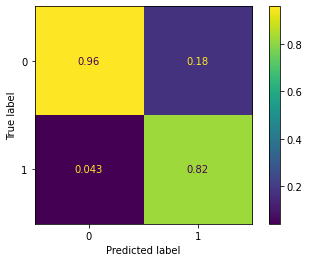

In [ ]:
import matplotlib.pyplot as plt
metrics.plot_confusion_matrix(algorytm, X_test_stand, y_test, normalize = "pred")
plt.show

#algorytm przewidział 96% Not Hazardous dobrze i 82% Hazardous dobrze.

>10. Opracuj wykres krzywej `ROC` oraz oblicz współczynnik powierzchni pod krzywą `ROC` (`AUCROC`).

In [ ]:
#na podstawie predykcji
#nazwy setów: X_train, X_test, y_train, y_test

standaryzator = preprocessing.StandardScaler()
stand = standaryzator.fit(X_train)

In [ ]:
X_train_stand = standaryzator.fit_transform(X_train)
X_test_stand = standaryzator.fit_transform(X_test)

#algorytm
algorytm = linear_model.LogisticRegression(n_jobs = -1)

algorytm.fit(X_train_stand, y_train)

prawdop = algorytm.predict(X_test_stand)
prawdop

In [ ]:
FP_value, TP_value, prog_prawd = metrics.roc_curve(y_test, prawdop)

In [ ]:
ROC_score = metrics.roc_auc_score(y_test, prawdop)
ROC_score

0.8744016001049248

Text(0, 0.5, 'TP_VALUE')

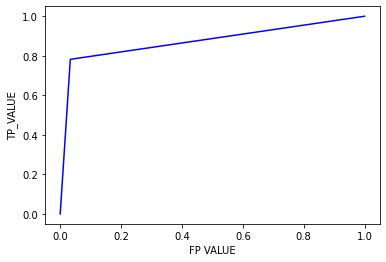

In [ ]:
#wykres roc
plt.plot(FP_value, TP_value, 'b',label = "ROC")
plt.xlabel("FP VALUE")
plt.ylabel("TP_VALUE")

>11. Przeprowadź proces walidacji krzyrzowej `cross_val_score()` (gdzie `n_splits=5`) wykorzystując cały zbiór danych przed podziałem na zbiór uczący i treningowy. 

In [ ]:
kolumny  = dane_clean.columns[:-1]
kolumny = list(kolumny) #to jest lista cech objaśniających, objasniane -> dane_clean['Hazardous']

In [ ]:
#utworzyć zbiór danych
x = dane_clean[kolumny]
y = dane_clean['Hazardous']

In [ ]:
from sklearn import pipeline
from sklearn import model_selection

#tak jak w poprzednich -> utworzyć metodę standaryzacji
standaryzator = preprocessing.StandardScaler()

#metoda modelowania
algorytm = linear_model.LogisticRegression()

#utworzenie procesu standaryzacji
proces = pipeline.make_pipeline(standaryzator, algorytm)

#mieszanie danych
walidacja = model_selection.KFold(n_splits = 5, shuffle = True, random_state=2020)

In [ ]:
wynik = model_selection.cross_val_score(proces,
                        x,
                        y,
                        cv=walidacja,
                        scoring = "accuracy",
                        n_jobs = -1)
wynik

array([0.95522388, 0.95202559, 0.94877268, 0.9583778 , 0.95517609])

In [ ]:
wynik.mean() #95% skuteczności

0.9539152082247704

>12. Porównaj wyniki modelu z/bez walidacji krzyrzowej, poprzez wyliczenie: **dokładności, pewności, precyzji i wskaźnika F1.** <br>
Wskazówka: przy podejściu walidacji krzyrzowej, są to wartości średnie.

In [ ]:
#walidacja krzyżowa -> dokładność F1

wynik = model_selection.cross_val_score(proces,
                        x,
                        y,
                        cv=walidacja,
                        scoring = "f1",
                        n_jobs = -1)
print(f'Dokładność F1 wynosi: {wynik.mean()}')

#walidacja krzyżowa -> precyzja 
wynik2 = model_selection.cross_val_score(proces,
                        x,
                        y,
                        cv=walidacja,
                        scoring = "precision",
                        n_jobs = -1)
print(f'Precyzja wynosi: {wynik2.mean()}')

#walidacja krzyżowa -> pewność
wynik3 = model_selection.cross_val_score(proces,
                        x,
                        y,
                        cv=walidacja,
                        scoring = "recall",
                        n_jobs = -1)
print(f'Pewność wynosi: {wynik3.mean()} \n')

print('Metryka modelu bez walidacji krzyżowej:')
print(metrics.classification_report(y_test,predykcja))

Dokładność F1 wynosi: 0.8553090586057321
Precyzja wynosi: 0.8633289285547011
Pewność wynosi: 0.8492415325472809 

Metryka modelu bez walidacji krzyżowej:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       782
           1       0.82      0.78      0.80       156

    accuracy                           0.94       938
   macro avg       0.89      0.87      0.88       938
weighted avg       0.93      0.94      0.94       938



In [ ]:
#statystyki modelu bez walidacji krzyżowej wyszły korzystniej

>13. Sprawdź czy różni się poziom **pewności, precyzji i wskaźnik F1**, jeżeli uwzględnimy fakt nierówności liczby obserwacji w różnych klasach. Przykładowo, możesz to zrobić poprzez wykorzystanie: `cross_val_score(...scoring = "f1_weighted"...)` dla wskaźnika F1.

In [ ]:
wynik = model_selection.cross_val_score(proces,
                        x,
                        y,
                        cv=walidacja,
                        scoring = "f1_weighted",
                        n_jobs = -1)
print(f'Dokładność F1 wynosi: {wynik.mean()}')

Dokładność F1 wynosi: 0.9537904611191612


In [ ]:
wynik = model_selection.cross_val_score(proces,
                        x,
                        y,
                        cv=walidacja,
                        scoring = "balanced_accuracy",
                        n_jobs = -1)
print(f'Dokładność F1 wynosi: {wynik.mean()}')

Dokładność F1 wynosi: 0.9116768206739596


>14. Przeprowadź redukcję wymiarowości poprzez analizę głównych składowych PCA. Zredukuj liczbę zmiennych objaśniających do 3 wymiarów. Zwizualizuj przygotowane zmienne na wykresie 3D, dodając informację o przynależności do klasy `Hazardous`, np. poprzez zmianę koloru. Czy na wykresie widać jawne skupiska klas?<br> *Wskazówka: przykładowe metody do wizualizacji znajdziesz w Lekcji 7.*

In [ ]:
from sklearn import decomposition

kompresor_pca = decomposition.PCA(n_components = 3)
fit_pca = kompresor_pca.fit(dane_clean)


X = fit_pca.transform(dane_clean)

print(X)


[[-2.86564214e+07 -4.54259717e+04 -1.12142804e+02]
 [-2.22334776e+07  8.14550026e+03 -2.66735710e+01]
 [ 3.62506035e+07 -1.16941197e+04 -8.22023921e+02]
 ...
 [ 3.44800631e+07 -1.41375560e+04 -9.08593146e+02]
 [-7.01232728e+05 -1.13983647e+04 -5.53264332e+02]
 [-3.62104066e+07  7.78118027e+04 -4.28596492e+02]]


In [ ]:
wykres_3d = pd.DataFrame(X,columns= ['a','b','c'])
#tworzenie kolumny z wartością objaśnianą -> hazardous
wykres_3d['Hazardous'] = dane_clean['Hazardous']

wykres = px.scatter_3d(wykres_3d,
                       x= 'a',
                       y='b',
                       z='c',
                       color='Hazardous')
wykres

>15. Podziel się wynikiem w grupie na [FB](https://bit.ly/2OSyHaG) podając hashtag `#modul6`.